In [ ]:
!pip install ultralytics

In [ ]:
import os
import glob
import numpy as np
from PIL import Image
from ultralytics import YOLO
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Choose proper pretrained model from yolo v8: small size model for detection task
# Change model kind to nano for faster prediction and medium for more accurate prediction
# Change model type from detection to segmentaftion for more accurate background reduction
model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:00<00:00, 80.3MB/s]


In [ ]:
os.chdir('/content/drive/MyDrive/CarCrashYOLO/images/test')

In [ ]:
# Get the list of JPG files in the directory
jpg_files = os.listdir('.')
jpg_files = [file for file in jpg_files if file.lower().endswith('.jpg')][:2000]


image 1/1 /content/drive/MyDrive/CarCrashYOLO/images/test/001347_7.jpg: 384x640 4 persons, 9 cars, 1 motorcycle, 1 traffic light, 1358.3ms
Speed: 5.8ms preprocess, 1358.3ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


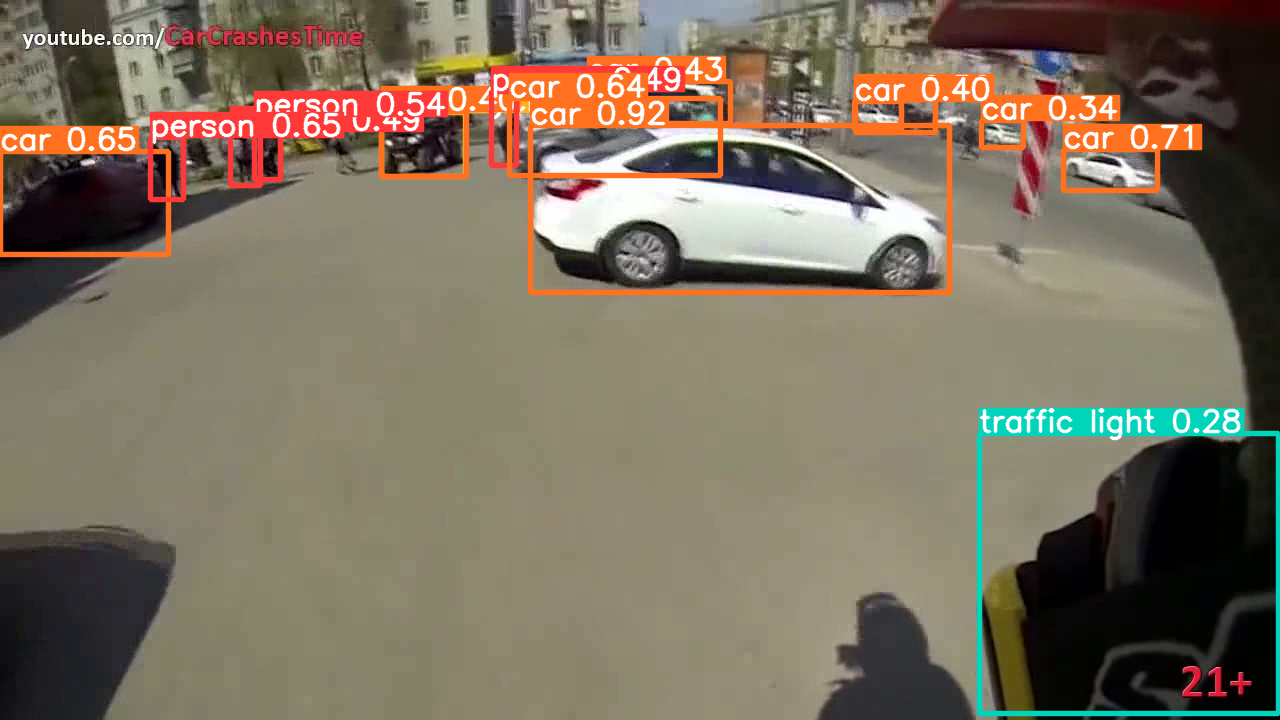

tensor([[5.3050e+02, 1.2597e+02, 9.4948e+02, 2.9297e+02, 9.1669e-01, 2.0000e+00],
        [1.0633e+03, 1.4999e+02, 1.1576e+03, 1.9035e+02, 7.1038e-01, 2.0000e+00],
        [1.5025e+02, 1.3788e+02, 1.8314e+02, 1.9940e+02, 6.4948e-01, 0.0000e+00],
        [2.1530e-01, 1.5171e+02, 1.6861e+02, 2.5490e+02, 6.4653e-01, 2.0000e+00],
        [5.0934e+02, 9.8838e+01, 7.2006e+02, 1.7512e+02, 6.4328e-01, 2.0000e+00],
        [2.5425e+02, 1.1680e+02, 2.8041e+02, 1.7904e+02, 5.4195e-01, 0.0000e+00],
        [2.3024e+02, 1.3158e+02, 2.6017e+02, 1.8521e+02, 4.8853e-01, 0.0000e+00],
        [4.9166e+02, 9.1094e+01, 5.1628e+02, 1.6519e+02, 4.8645e-01, 0.0000e+00],
        [5.8714e+02, 8.1575e+01, 7.3074e+02, 1.2302e+02, 4.2737e-01, 2.0000e+00],
        [8.5499e+02, 1.0108e+02, 9.0146e+02, 1.2981e+02, 3.9680e-01, 2.0000e+00],
        [3.8135e+02, 1.1103e+02, 4.6629e+02, 1.7629e+02, 3.9655e-01, 2.0000e+00],
        [3.8173e+02, 1.1247e+02, 4.6583e+02, 1.7627e+02, 3.8307e-01, 3.0000e+00],
        [8.5528e

In [ ]:
# Run inference on 'bus.jpg'
results = model(jpg_files[0])  # results list

# Show the results
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    im.show()  # show image
    display(im)
    print(r.boxes.data)  # print the Boxes object containing the detection bounding boxes
    print(r.boxes.data.shape)


image 1/1 /content/drive/MyDrive/CarCrashYOLO/images/test/001347_8.jpg: 384x640 3 persons, 9 cars, 1 motorcycle, 937.3ms
Speed: 2.9ms preprocess, 937.3ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


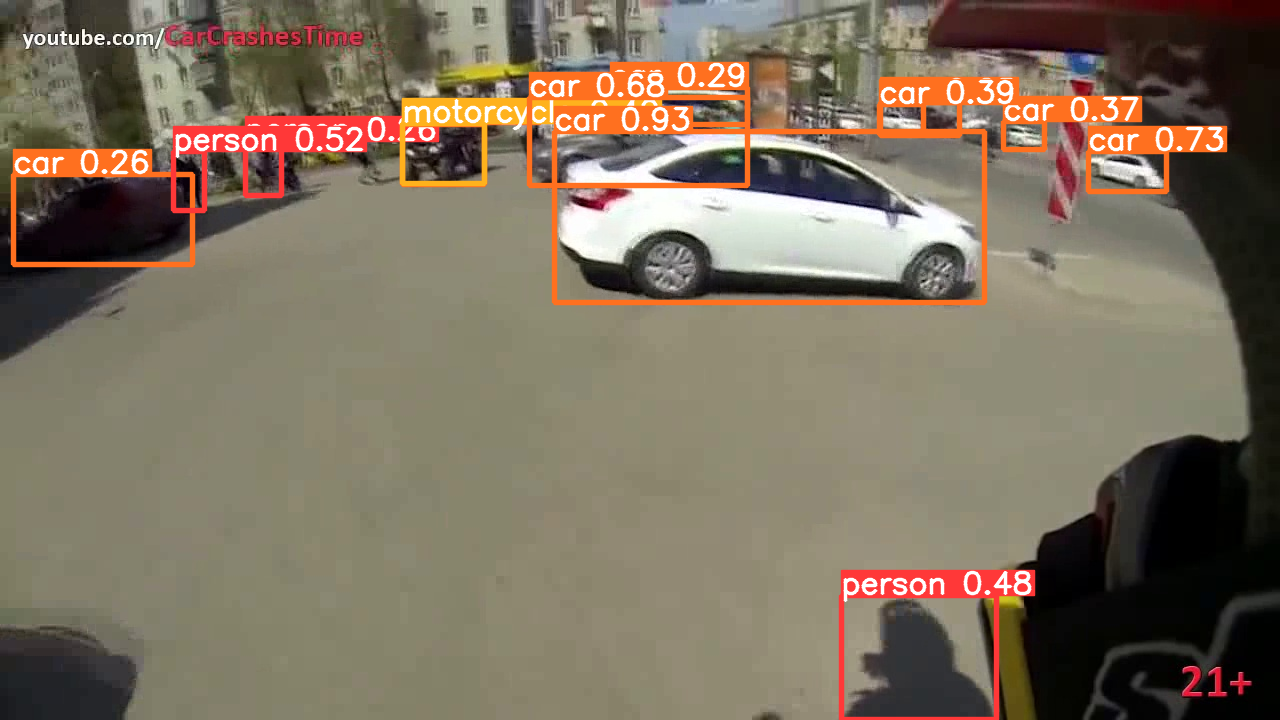

tensor([[5.5482e+02, 1.3179e+02, 9.8402e+02, 3.0279e+02, 9.2500e-01, 2.0000e+00],
        [1.0889e+03, 1.5123e+02, 1.1661e+03, 1.9125e+02, 7.2783e-01, 2.0000e+00],
        [5.2951e+02, 9.7978e+01, 7.4738e+02, 1.8539e+02, 6.7828e-01, 2.0000e+00],
        [1.7341e+02, 1.5127e+02, 2.0430e+02, 2.1018e+02, 5.2210e-01, 0.0000e+00],
        [8.4131e+02, 5.9573e+02, 9.9612e+02, 7.1916e+02, 4.8295e-01, 0.0000e+00],
        [4.0207e+02, 1.2359e+02, 4.8471e+02, 1.8392e+02, 4.0401e-01, 3.0000e+00],
        [8.7954e+02, 1.0431e+02, 9.2387e+02, 1.3408e+02, 3.8563e-01, 2.0000e+00],
        [1.0036e+03, 1.2154e+02, 1.0447e+03, 1.4963e+02, 3.7174e-01, 2.0000e+00],
        [6.1051e+02, 8.7870e+01, 7.4738e+02, 1.2450e+02, 2.8842e-01, 2.0000e+00],
        [4.0274e+02, 1.2421e+02, 4.8429e+02, 1.8437e+02, 2.7151e-01, 2.0000e+00],
        [1.3094e+01, 1.7470e+02, 1.9264e+02, 2.6496e+02, 2.6426e-01, 2.0000e+00],
        [2.4536e+02, 1.4169e+02, 2.8121e+02, 1.9528e+02, 2.5978e-01, 0.0000e+00],
        [8.8018e

In [ ]:
# Run inference on 'bus.jpg'
results = model(jpg_files[1])  # results list

# Show the results
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    im.show()  # show image
    display(im)
    print(r.boxes.data)  # print the Boxes object containing the detection bounding boxes
    print(r.boxes.data.shape)

In [ ]:
def draw_bounding_boxes(image, boxes):
    """
    Draw bounding boxes on an image.

    Parameters:
    image (numpy.ndarray): The image on which to draw.
    boxes (numpy.ndarray): A (19, 6) array where each row contains (x1, y1, x2, y2, probability, class).
    class_labels (list): A list of class labels.

    Returns:
    numpy.ndarray: The image with bounding boxes.
    """
    for box in boxes:
        x1, y1, x2, y2, prob, class_id = box
        class_id = int(class_id)

        # Draw the bounding box
        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)

        # Prepare the label text
        label = f"{class_id}: {prob:.2f}"

        # Calculate text width & height to draw the text background
        text_size = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2)[0]
        text_x = int(x1)
        text_y = int(y1) - 10
        cv2.rectangle(image, (text_x, text_y), (text_x + text_size[0], text_y - text_size[1]), (255, 0, 0), cv2.FILLED)

        # Put the label text on the image
        cv2.putText(image, label, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    return image

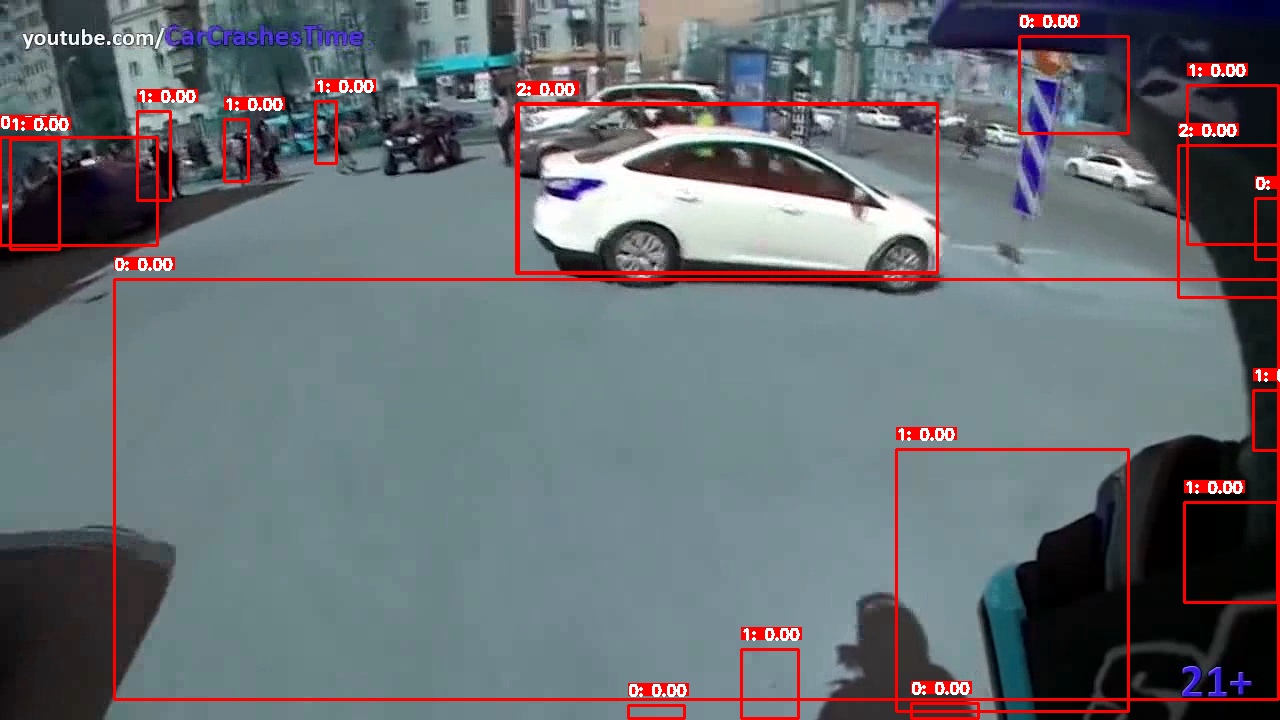

In [ ]:
import cv2
image = cv2.imread(jpg_files[0])
image_rgb = draw_bounding_boxes(image, boxx)
display(Image.fromarray(image_rgb))

In [ ]:
def calculate_iou(box1, box2):
    """
    Calculate the Intersection over Union (IoU) of two bounding boxes.
    """
    x1_inter = max(box1[0], box2[0])
    y1_inter = max(box1[1], box2[1])
    x2_inter = min(box1[2], box2[2])
    y2_inter = min(box1[3], box2[3])

    intersection_area = max(0, x2_inter - x1_inter) * max(0, y2_inter - y1_inter)

    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    union_area = box1_area + box2_area - intersection_area

    iou = intersection_area / union_area
    return iou

def calculate_metrics(pred_boxes, true_boxes, iou_threshold=0.5):
    """
    Calculate metrics like IoU, Precision, Recall, and mAP for object detection.
    """
    true_positives = 0
    false_positives = 0
    false_negatives = len(true_boxes)

    for pred_box in pred_boxes:
        for true_box in true_boxes:
            iou = calculate_iou(pred_box[:4], true_box[:4])

            if iou > iou_threshold and pred_box[5] == true_box[5]: # Class label must also match
                true_positives += 1
                false_negatives -= 1
                break
        else:
            false_positives += 1

    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0

    # mAP calculation would require computing the precision-recall curve over varying thresholds
    # and is more complex to implement correctly. It's often done using additional libraries.

    return {
        'IoU': [calculate_iou(pred_box[:4], true_box[:4]) for pred_box, true_box in zip(pred_boxes, true_boxes)],
        'Precision': precision,
        'Recall': recall,
        # 'mAP': mAP  # mAP calculation is not included in this basic implementation
    }

In [ ]:
root_pos = '/content/drive/MyDrive/CarCrash/vgg16_features/positive'
frame = jpg_files[0].split('.')[0]
video = frame.split('_')[0]
frame_num = frame.split('_')[1]
path = os.path.join(root_pos,  video+'.npz')
feature = np.load(path)

In [ ]:
boxx = feature['det'][int(frame_num)]